# Python Notebook Part II

Various programs and notes for future reference, many from the Google machine learning course

## OS

The OS module is an extremely powerful module for manipulating the local file structure. The module can read and write files, manipulate paths, and change the current working directory.

### Python IO

IO in Python is partially built-in, and so the basic commands for reading and writing are not technically part of the OS module. Nevertheless, they are included here. For basic reading and writing, the following syntax is used.

In [10]:
with open('filename.txt', 'w') as f:
    f.write('Hello World!')
    
with open('filename.txt', 'r') as f:
    file = f.read() # read the entire file
    line1 = f.readline() # read line by line (this reads the first line)
    line2 = f.readline() # this reads the second line
    f.seek(5) # seeks the 5th line of the file

### Path Manipulation

The OS module can be used to manipulate path names in a platform independent way, without worrying about what characters are used to delimite the path.

In [16]:
import os

base_path = '/Users/JAustin/Desktop' # this is bad, fix this later

new_path = os.path.join(base_path, 'new_directory') # combine two paths

dir_name = os.path.basename(os.path.normpath(new_path)) # get last part of new_path

messy_path = '/Users/JAustin/Desktop/\n\n\n  \n\n  \n'
clean_path = messy_path.rstrip()
print(clean_path)

path_list = os.path.split(os.path.normpath(new_path)) # fix this later, 
print(path_list)

/Users/JAustin/Desktop/
('/Users/JAustin/Desktop', 'new_directory')


## Unit Test

The unittest module is a testing module in the Python standard library. Instead of being forced to test each program manually in an interpreter, or to write an elaborate try/except testing suite, unittest will automatically run the tests you implement separately and record the results for each. [Reference](https://www.youtube.com/watch?v=FxSsnHeWQBY).

In [3]:
# portfolio.py

class Portfolio: # an example class that needs to be tested
    def __init__(self):
        self.stocks = []
        
    def buy(self, name, shares, price):
        self.stocks.append([name, shares, price])
        
    def cost(self):
        amt = 0.0
        for name, shares, price in self.stocks:
            amt += shares*price
        return amt

In [4]:
#portfolio_test.py

import unittest
# import portfolio

class PortfolioTest(unittest.TestCase): # a unittest
    def test_buy_one_stock(self):
        p = Portfolio()
        p.buy(["IBM", 100, 168.72])
        #assert p.cost() == 16872.0
        self.assertEqual(p.cost(), 16872.0) # this is a unittest method inherited from unittest.TestCase which performs a more verbose assert

We then run the test from the command line using: `$ python -m unittest portfolio_test.py`. The -m tag runs the program in the unittest module. Here we choose to use assertEqual, inherited from unittest.TestCase, but unittest defines many more such assertion methods, described in the documentation. In addition, we can create our own TestCase class which adds new methods.

In [5]:
class PortfolioTestCase(unittest.TestCase):
    def assertCostEqual(self, p, cost):
        self.assertEqual(p.cost(), cost)

Then our unittests look like this:

In [6]:
class PortfolioTest(PortfolioTestCase):
    def test_buy_one_stock(self):
        p = Portfolio()
        p.buy(["IBM", 100, 168.72])
        self.assertCostEqual(p, 16872.0)

To test for expected errors, we can use the assertRaises() method, like this:

In [7]:
def test_bad_input(self):
    p = Portfolio()
    with self.assertRaise(TypeError):
        p.buy("IBM")

## Argparse

The argparse module allows Python programs to take Unix-style command line arguments.

In [ ]:
import argparse

parser = argparse.ArgumentParser(description="...") # create parser object

# add an optional command line arguments -i, stored in the parser namespace as path, which invokes an action
# when called, and uses a custom type check function. 

parser.add_argument("-i", dest="path", required=False, help="path to database directory",
                    metavar="PATH", action=FullPaths, type=is_valid_path, default='.')

args = parser.parse_args() # read all arguments

os.chdir(args.path) # extract path argument from namespace, reading default if nothing has been specified.

This is a simple example, which takes a single argument of the form '-i ../file_name', and changes to that directory when the program begins running. The action and type handlers are defined below. 

In [ ]:
import os
from glob import glob

def is_valid_path(arg):
    if not os.path.exists(arg):
        parser.error("The directory %s does not exist!" % arg)
    else:
        return arg

class FullPaths(argparse.Action):
    """Expand user- and relative-paths"""
    def __call__(self, parser, namespace, values, option_string=None):
        setattr(namespace, self.dest, os.path.abspath(os.path.expanduser(values)))

def is_valid_type(arg):
    if not arg in ['.jpg', '.png']:
        parser.error("%s is not a valid extention!" % arg)
    else:
        return arg

The "is_valid_path" function is called on the given argument to ensure that it is in fact a valid path. The FullPaths argument inherits from the argparse.Action class, and overwrites the \__call\__ method to add the absolute path instead of the relative path on the user's system. The full documentation is found [here](https://docs.python.org/2/library/argparse.html).

## Glob

The glob module enables Unix-style pattern search in Python. It takes a filename pattern and returns a list of all files in the file system that satisfy that pattern.

In [1]:
from glob import glob
import os

os.chdir('/Users/JAustin/Desktop')

pattern = '*.ipynb'

files = glob(pattern)

print(files)

['Full DCGAN Notebook.ipynb', 'Labeled MNIST GAN-Copy1.ipynb', 'Labeled MNIST GAN.ipynb', 'MNIST DCGAN.ipynb', 'OpenImages.ipynb', 'Simple MNIST Model (keras).ipynb']


## Numpy

### Array Size

All Numpy arrays store several size attributes, include size, shape, and nbytes. Size returns the total number of elements in the array, shape returns the actual array shape, and nbytes returns the size of the array in bytes.

In [8]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); print(A, '\n')

print("Size:", A.size)
print("Shape:", A.shape)
print("Bytes:", A.nbytes) # elements are stored as 8-byte integers, so 9*8 = 72 bytes

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

Size: 9
Shape: (3, 3)
Bytes: 72


### New Line

Many complicated matrix operations can be achieved without iteration using the np.new_line() command, which converts an object of shape (n,) to (n, 1).

In [33]:
import numpy as np

A = np.array([1, 2, 3])
print(np.shape(A))

new_axis = A[:,None] # this is an alias for np.newaxis, which creates a new axis of length 1 using existing data.
print(np.shape(new_axis))

(3,)
(3, 1)


### Extending Matrix to New Axis

A 2-dimensional array can be converted to a 3-dimensional array of arbitrary size using the np.repeat() command, which repeats the 2-dimensional array over some number of new entries in the the third dimension.

In [5]:
import numpy as np

A = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])

print(A, '\n')

B = np.repeat(A[:, :, None], 3, axis=2)

print(B[:, :, 2])

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[1 2 3]
 [4 5 6]
 [7 8 9]]


If I want the resulting matrix indexed by the first axis, I can transpose the matrix.

In [8]:
C = B.transpose(2, 0, 1)

print(C[2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Pairwise difference and norm

Finding the distance between two sets of vectors can be very expensive using a for loop, but the Numpy implementation using broadcasting is much more efficient.

In [16]:
import numpy as np

x = np.random.rand(1000, 75)
y = np.random.rand(400, 75)

diff = x.reshape(1000, 1, 75) - y

print(diff.shape) # pairwise difference

norm = (diff ** 2).sum(2)

print(norm.shape) # norm (squared) for all pairs of vectors.

(1000, 400, 75)
(1000, 400)


### One Hot Encoding

We often want to convert lists of integers to one-hot encoded values with all-zero entries except at the index corresponding to those integers i.e. array of integers of length n to array of shape (n, m) where m is the number of classes.

In [4]:
import numpy as np

num_labels = 10
labels = np.array([1, 6, 3, 7, 2, 5, 3, 8, 4, 2])

def encode(labels, num_labels):
    return (np.arange(num_labels) == labels[:,None]).astype(np.float32)

new_labels = encode(labels, num_labels)

print(labels, '\n\n', new_labels)

[1 6 3 7 2 5 3 8 4 2] 

 [[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


### Reshape

The reshape command is a core numpy method that changes the shape of an array. An index of -1 can be used in one axis to infer its size from the other reshape values so as to leave the total size unchanged.

In [36]:
A = np.array([[1,2,3], [4,5,6]])
new_arr = A.reshape((3,-1)) # -1 infers value from other indices, in this case 2.
print(new_arr)

[[1 2]
 [3 4]
 [5 6]]


## Timing

The timing module, timeit, can be used to measure code execution time. The basic command is timeit.repeat, which executes a certain code segment a certain number of times, and reports execution time. 

In [ ]:
import timeit

if __name__ == '__main__':
    print(min(timeit.repeat("insert_code_here", setup="from __main__ import method_names_here", number=1000, repeat=1000)))

## H5PY and Pillow

The .h5 and .pillow formats are convenient file formats for storing structured data in a Unix-like file structure. An .h5 file is like a directory, and contains subdirectories, called groups, which themselves contain datasets, which are numpy-like arrays.

To create a new h5 file, and add datasets, do the following:

In [33]:
import h5py

#f.close()

f = h5py.File('example.h5', 'w')

f.create_dataset('dataset', (100,), dtype='i')

dataset = f['dataset']

print(dataset.shape)

f.close()

(100,)


To open an existing h5 file and read its contents, do the following:

In [34]:
import h5py

f = h5py.File('example.h5', 'r')

print(list(f.keys())) # f.keys() returns a module specific object, which in Python3 must be converted explicitly to a list

dataset = f['dataset']

print(dataset.shape, dataset.size, dataset[0:10]) # dataset has NumPy like properties

f.close()

['dataset']
(100,) 100 [0 0 0 0 0 0 0 0 0 0]


This dataset can be converted to a numpy array using np.asarray, and manipulated there.

.h5 files have a directory like structure, and use groups in the place of directories. For example:

In [35]:
import h5py

f = h5py.File('example.h5', 'a')

dataset = f['dataset']

print(dataset.name)

grp = f.create_group('group')

print(grp.name)

dset2 = grp.create_dataset('dataset_two', (10,), dtype='i') # dataset located at root/group/dataset_two

print(dset2.name)

dset3 = f.create_dataset('subgroup2/dataset_three', (10,), dtype='i') # don't need to specify all intermediate paths.

f.close()

/dataset
/group
/group/dataset_two


## Functools

Functools is a module that provides decorators and other functions for managing function execution.

### Functools.partial

functools.partial is a command that converts a function of several arguments into a function of fewer arguments by providing a default value.

In [6]:
import functools

def add(x, y):
    return x + y

add3 = functools.partial(add, 3)

add3(4)

7

### Functools.lru_cache

The functools lru_cache caches function calls in memory, which can be useful is a particular function is likely to be called many times with the sample arguments. For example, it can vastly improve the efficiency of a Fibonacci generator.

In [1]:
from functools import lru_cache

@lru_cache(maxsize=None) #lru_cache caches the output of each fib(n) call, so they aren't repeated
def fib(n):
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)

fib(10)

55

## Parsing JSON

In [3]:
import json
j = json.loads('{"one" : "1", "two" : "2", "three" : "3"}')
print(j['two'])

2


## Other

### Simultaneous Assignment

In [44]:
def fibonacci(n): # neat expression with simultaneous variable assignment/unpacking
    x, y = 0, 1
    for i in range(n):
        print(x)
        x, y = y, x + y
        
fibonacci(10)

0
1
1
2
3
5
8
13
21
34


## Names and Variables

Variables in Python are labels, which point to objects in memory. The Python interpreter keeps track of the number of labels assigned to an object, a method called reference counting, and when no more labels point to an object, it is destroyed. Assignment never copies data, it just makes new labels point to objects in memory.

In [5]:
x = 3 # creates an integer object holding the value three, and then points the label x at it
y = x # points the label y at the object pointed to by x. Both now point to the same 3 object equally.
x = 4 # creates a new integer object, and reassigns x to that object. y still points to the 3.
print("x:", x, "y:", y)

x = [1, 2, 3] # creates a list object
y = x # y now points to the same list
y.append(4) # adds a 4 to the end of the list. There is only one list, which y and x both point to. Append doesn't create a new list.
print("x:", x, "y:", y)

x: 4 y: 3
x: [1, 2, 3, 4] y: [1, 2, 3, 4]


**Mutability:** ints, floats, strings, and tuples are immutable types in Python. There are no methods which allow you to change their values. Instead, any operation which tries to change their values will create a new object.

In [ ]:
x = "Hello " # creates string object and assigns label x/
y = x # y and x now point to the same object
x = x + "World!" # this addition operation creates a new value, because strings are immutable. 
# x now points to that new object

print("x:", x, "y:", y)

x = "Hello!"
y = x
x[0] = 'h' # this throws an error, because strings are immutable

Strings in particular are immutable because they are often used as dictionary keys, and allowing them to be mutated would cause headaches with hash keys. This example from [Stack Overflow](https://stackoverflow.com/questions/8680080/why-are-python-strings-immutable-best-practices-for-using-them) is useful.

In [ ]:
class Foo(object):
    def __init__(self, name):
        self.name = name

name = "Hello"
foo = Foo(name)
name[0] = "J" # if strings were not immutable, this would change the class name, which would be problematic.

When we call a function or instantiate a class with arguments, it behaves the same way.

In [13]:
def foo(y):
    y = 4
    
x = 3 
foo(x)

print(x)

3


Here we create an int 3, and a label x pointing to that object. Then we pass it to foo, where the label y in namespace foo points to same int object 3. Then that label is reassigned to a new int object 4 which only exists in the foo namespace. Then the label y and object int 4 go out of scope and are destroyed. x is unchanged. However, if the type passed as an argument is immutable, it can be modified without reassignment.

In [17]:
def foo(y):
    y.append(4)
    
x = [1, 2, 3] # create list object with label x
foo(x) # label y in foo namespace points to same object, and then an int is appended to it. No reassignment!
print(x)

[1, 2, 3, 4]


In [18]:
x = 3
y = [1, 2, 3]


x = x + 1 # rebinding x to new object
y.append(4) # mutating list y

### Other assignment operations:

Certain operations which look like assignments are actually mutations for mutable types. For instance, the list plus equals += is implemented by \_\_iadd\_\_, and mutates the object in place. This behaves differently from x = x + [1, 2, 3].

In [23]:
x = [1, 2, 3]
y = [4, 5]

x += y

print("x:", x, "y:", y)

x: [1, 2, 3, 4, 5] y: [4, 5]


In [24]:
def append_twice_good(x, val):
    x += [val, val]
    
def append_twice_bad(x, val):
    x = x + [val, val]
    
x = [1, 2, 3]

append_twice_good(x, 4)

print(x)

x = [1, 2, 3]

append_twice_bad(x, 4)

print(x)

[1, 2, 3, 4, 4]
[1, 2, 3]


### More Weirdness

In [35]:
x = [1, 2, 3]

y = x[1]

y = 4 # int x[1] is immutable, so x is unchanged

print("x:", x, "y:", y)

x = [1, 2, 3]
y = x[0:2] # slicing creates a new list, per python standards, so y is unrelated to x
y[1] = 4 # this doesn't change x

print("x:", x, "y:", y)

#Slice assignment however does not make a new object

x = [1, 2, 3]
x[0:2] = [2, 3]

print(x)

x: [1, 2, 3] y: 4
x: [1, 2, 3] y: [1, 4]
[2, 3, 3]


## Safe Download from URL

This is a simple program which downloads files from a given URL, and reports download progress in the console. The program also validates the file after it has been downloaded and prevents overwriting. The basic program is derived from code used in the first Google ML assignment.

In [1]:
import os
import sys
from six.moves.urllib.request import urlretrieve

url = 'https://commondatastorage.googleapis.com/books1000/' # url to file repository
last_percent_reported = None
data_root = '.' # local path to desired directory


def download_progress_hook(count, blocksize, totalSize):
    global last_percent_reported
    percent = int(count * blocksize * 100 / totalSize)

    if last_percent_reported != percent:
        if percent % 5 == 0:
            sys.stdout.write('{}%'.format(percent))
            sys.stdout.flush()
        else:
            sys.stdout.write('.')
            sys.stdout.flush()

        last_percent_reported = percent

def maybe_download(filename, expected_bytes, force=False): # force tells the program to overwrite any existing file with the same address
    dest_filename = os.path.join(data_root, filename)
    if force or not os.path.exists(dest_filename):
        print('Attempting to download:', filename)
        filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
        print('\nDownload Complete!')
    statinfo = os.stat(dest_filename)
    if statinfo.st_size == expected_bytes:
        print('Found and verified', dest_filename)
    else:
        raise Exception(
            'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
    return dest_filename


#train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)


Attempting to download: notMNIST_small.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified ./notMNIST_small.tar.gz


## Machine Learning

### MNIST Dataset

The following programs are written to identify numbers and letters from the [MNIST](http://yann.lecun.com/exdb/mnist/) and [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) datasets, using a variety of machine learning techniques. Those files can be downloaded using the previous program.

### K-NN Method

This program uses a simple pseudo K-NN method to identify images from the modified MNIST dataset (available from [kaggle](https://www.kaggle.com/c/digit-recognizer)). The program imports and sorts the images, and then averages the classes of all images in the training set within a certain Euclidean distance dist).

In [3]:
import numpy as np

csv = np.genfromtxt('train.csv', delimiter=",", dtype=int)
test = np.genfromtxt('test.csv', delimiter=",", dtype=int)[1:,:]

print("The files have finished importing!")

index=csv[1:,0]

solution_arr=np.zeros((len(test),2))
dist=1600
matr=csv[1:,1:]

for i in range(0,len(test)):
    k=0
    x=test[i]
    count=np.zeros(10)
    for j in range(0,len(matr)):
        if np.linalg.norm(matr[j]-x)<dist:
            k+=1
            for m in range(0,10):
                if index[j] == m:
                    count[m]+=1
    prob=count/k
    
    solution_arr[i,0]=i
    solution_arr[i,1]=np.argmax(prob) #max value
    
    if i % 500 == 0:
        print('{}/{} images have been processed.'.format(i, len(test)))
    
np.savetxt("results.csv", solution_arr, fmt='%i', delimiter=",")

OSError: train.csv not found.

This program could be improved by optimising the dist value to avoid over or under fitting, and by actually choosing the k closest neighbors.

### Off-the-shelf Logistic Regression Model on notMNIST

This program applies the off-the-shelf sklearn logistic regression model to the notMNIST dataset, producing relatively efficient but inaccurate results. The implementation is very simple, using the database saved by the 1_notmnist notebook.

In [6]:
from sklearn import linear_model
import string
import numpy as np

dataset=np.load('notMNIST.pickle')
data_length = 5000
train_dataset=dataset['train_dataset']
train_labels=dataset['train_labels']
train_2d=train_dataset.reshape(len(train_dataset),784)
valid_dataset=dataset['valid_dataset']
valid_2d=valid_dataset.reshape(len(valid_dataset),784)
valid_labels=dataset['valid_labels']

In [7]:
model = linear_model.LogisticRegression()
classifier=model.fit(train_2d[0:data_length],train_labels[0:data_length])

In [29]:
count = 10;
prediction = classifier.predict(valid_2d[0:count,:])
actual = valid_labels[0:count]
correct = np.sum(prediction == actual)
percent = correct/count*100
print("{} percent of the images were correctly predicted!".format(percent))

#for i in range(count):
#    print("The predicted value for this image is: {}, and the actual value is {}. ".format(string.ascii_uppercase[prediction[i]],string.ascii_uppercase[actual[i]]))

90.0 percent of the images were correctly predicted!
The predicted value for this image is: E, and the actual value is B. 
The predicted value for this image is: J, and the actual value is J. 
The predicted value for this image is: D, and the actual value is D. 
The predicted value for this image is: I, and the actual value is I. 
The predicted value for this image is: J, and the actual value is J. 
The predicted value for this image is: D, and the actual value is D. 
The predicted value for this image is: J, and the actual value is J. 
The predicted value for this image is: H, and the actual value is H. 
The predicted value for this image is: A, and the actual value is A. 
The predicted value for this image is: H, and the actual value is H. 


Now we can display the relevant images for review.

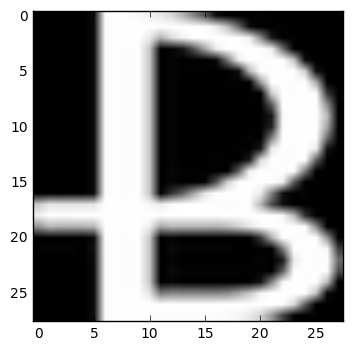

In [33]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(1): # or range(count)
    plt.imshow(valid_dataset[i],'Greys_r')
    plt.show()

### Convolution Networks

Much of the following is inspired by the [Karpathy notes](http://cs231n.github.io/convolutional-networks/) from the Stanford CS231n class.

Convolution networks are designed to exploit the strong positional invariance properties of images to perform feature recognition for even high-resolution photographs. These layers are much smaller than fully connected layers, and can even downsample the images while extracting the relevant features. 

The basic premise is as follows, for the example of a 28x28x3 image and a 5x5x8 (x3) shared convolution layer with stride 2.

1. A region of the image of size 5x5x3 is multiplied elementwise by each of eight 5x5x3 layers in the filter, producing a 5x5x3x8 output array.

2. Each 5x5x3 layer is summed to a single element, and a bias is added.

3. This is repeated over the entire image, with stride 2, resulting in an image of size 14x14x8.

4. A loss function is backpropogated through the network.